In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_qbr_salary_18-19')

In [3]:
qbs.dtypes

NAME         object
QBR         float64
QBR_rank    float64
salary        int64
dtype: object

In [4]:
qbs.head()

,NAME,QBR,QBR_rank,salary
0,Patrick Mahomes,113.5,1.0,4106447
1,Russell Wilson,109.1,2.0,21900000
2,Matt Ryan,108.1,4.0,30000000
3,Philip Rivers,105.7,5.0,20812500
4,Drew Brees,105.1,6.0,25000000


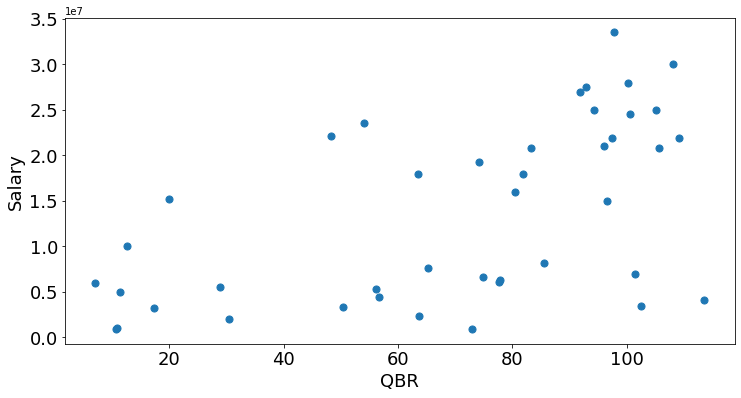

In [5]:
ax = qbs.plot(kind="scatter", x = 'QBR',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('QBR', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['QBR', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 9.51619735e-17, -8.72318091e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.01083948,  0.6198265 ],
       [-1.63446612, -0.84658376],
       [ 0.92762483, -0.62983535],
       [ 0.9279837 ,  1.22305955],
       [-0.10976191, -0.91634105]])

In [11]:
km.predict(X)

array([2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 0, 0, 0, 4, 4,
       4, 0, 4, 4, 4, 0, 4, 4, 0, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,QBR,QBR_rank,salary,clusters
0,Patrick Mahomes,113.5,1.0,4106447,2
1,Russell Wilson,109.1,2.0,21900000,3
2,Matt Ryan,108.1,4.0,30000000,3
3,Philip Rivers,105.7,5.0,20812500,3
4,Drew Brees,105.1,6.0,25000000,3


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[6.93714286e+01, 1.96633333e+07],
       [1.65888889e+01, 5.44317000e+06],
       [9.98800000e+01, 7.54503600e+06],
       [9.98916667e+01, 2.55130417e+07],
       [6.61555556e+01, 4.76671533e+06]])

In [14]:
qbs.groupby('clusters')[['QBR', 'salary']].mean()

,QBR,salary
clusters,,
0,69.371429,1.966333e+07
1,16.588889,5.443170e+06
2,99.880000,7.545036e+06
3,99.891667,2.551304e+07
4,66.155556,4.766715e+06


In [15]:
centroids = qbs.groupby('clusters')[['QBR', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

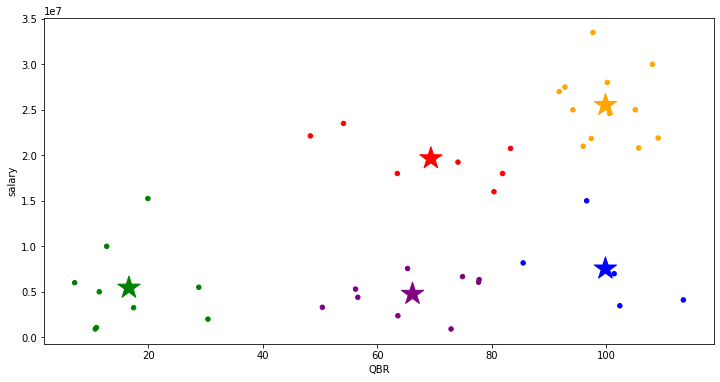

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'QBR', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'QBR', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

8.580430820803537

In [18]:
silhouette_score(X, km.labels_)

0.4932016890877117